In [1]:
#import os, sys
#from google.colab import drive
#drive.mount('/content/drive')
#nb_path = '/content/notebooks'
#os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
#sys.path.insert(0,nb_path)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 45.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 70.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 109.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 44.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import  roc_curve, auc, roc_auc_score


In [6]:
#pip install --target=$nb_path ktrain

In [7]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [9]:
data_train = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2021_altın_mudahale/train.csv', encoding='latin-1')

In [10]:
data_train.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,6000,"âºchase freedom 5x: activate q1 2022, finish ...",0.000000,0.00,Neutral
1,6001,card-as-a-service companies provide comprehens...,0.000000,0.00,Neutral
2,6002,ðð³the deserve edu mastercard credit card...,0.166667,0.20,Positive
3,6003,$smme news: smartmetric reveals 60% existing c...,0.750000,0.25,Positive
4,6004,i'm happy quoted piece sharing insights (and d...,1.000000,0.80,Positive


In [11]:
data_test = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2021_altın_mudahale/test.csv', encoding='latin-1')

In [12]:
data_test.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,0,"50,000 finnish industrial workers threaten str...",0.000000,0.000000,Neutral
1,1,happened btc$100k eoy ð¤·ââï¸ reminds fo...,0.000000,0.000000,Neutral
2,2,plop supercooled ice ð¦ copper gold swimming...,0.400000,-0.150000,Negative
3,3,jp morgan turns bearish anything-- especially ...,1.000000,0.000000,Neutral
4,4,2021 year clean energy finally faced mining pr...,0.679451,0.157656,Positive


In [13]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0";

In [14]:
X_train = data_train.tweet.values.astype(str).tolist()
y_train = data_train.Analysis.values.astype(str).tolist()

X_test = data_test.tweet.values.astype(str).tolist()
y_test = data_test.Analysis.values.astype(str).tolist()

In [15]:
len(X_train), len(X_test)

(2928, 6000)

In [16]:
y_test

['Neutral',
 'Neutral',
 'Negative',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Negative',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Negative',
 'Neutral',
 'Neutral',
 'Negative',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Negative',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Negative',
 'Neutral',
 'Neutral',
 'Negative',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Negative',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Negative',
 'Neutral',
 'Neutral',
 'Negative',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Negative',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Negative',
 'Neutral',
 'Neutral',
 'Negative',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Negative',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Negative',
 'Neutral',
 'Neutral',
 'Negative',
 'Neutral',
 'Positive'

In [17]:
# Building model with transformer
model_name = 'distilbert-base-uncased'

trans = text.Transformer(model_name, maxlen=512)

In [18]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 17
	95percentile : 39
	99percentile : 41


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 16
	95percentile : 35
	99percentile : 43


In [19]:
# getting distilbert model.
model = trans.get_classifier()

In [20]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 16)

In [21]:
# learner.lr_find(show_plot=True, max_epochs=10)

In [22]:
history = learner.fit_onecycle(1e-4, 3)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/3
183/183 [==============================] - 200s 1s/step - loss: 0.3528 - accuracy: 0.8788 - val_loss: 1.5407 - val_accuracy: 0.6360
Epoch 2/3
183/183 [==============================] - 194s 1s/step - loss: 0.1002 - accuracy: 0.9740 - val_loss: 1.0773 - val_accuracy: 0.7587
Epoch 3/3
183/183 [==============================] - 196s 1s/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 1.1987 - val_accuracy: 0.7552


In [23]:
learner

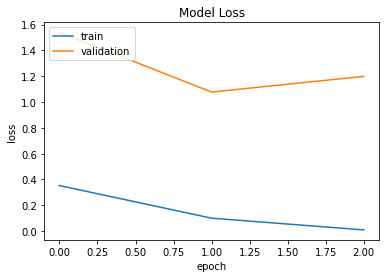

In [24]:
learner.plot('loss')

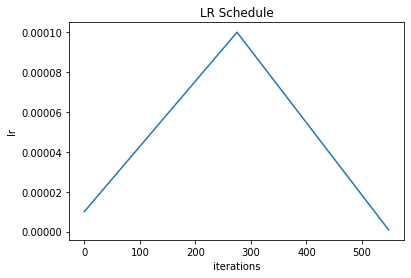

In [25]:
learner.plot('lr')

In [26]:
learner.validate()

188/188 [==============================] - 36s 182ms/step
              precision    recall  f1-score   support

           0       0.36      0.12      0.17       725
           1       0.75      0.95      0.84      3349
           2       0.84      0.66      0.74      1926

    accuracy                           0.76      6000
   macro avg       0.65      0.57      0.58      6000
weighted avg       0.73      0.76      0.72      6000



array([[  84,  512,  129],
       [  53, 3180,  116],
       [  99,  560, 1267]])